# Pymaceuticals Inc.
---

### Analysis

- The Ramicane drug regimen was the most effective across all 4 drug regimens despite having slighly lower timepoints.
- The Infubinol drug regimen was the least effective by far across all 4 drug regimens and in fact made the growth of tumor   volume increase over the course of the drug regimen. 
- The Ceftamin drug regimen was nearly as uneffective as the Infubinol but with lower timepoints
- There is a positive inverse correlation between the weight of the mouse and the average observed turmor volume for mice   treated with Capomulin. As the weight of the mouse increases the average observed turmor volume increases

### Starter Code

In [1]:
# Dependencies and Setup
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_data_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
df_mouse_data = pd.read_csv(mouse_data_path)
df_study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df_studydata = pd.merge(df_study_results, df_mouse_data,
                                 how='left', on="Mouse ID")

# Display the data table for preview
df_studydata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
df_mice_count = len(df_studydata["Mouse ID"].unique())
df_mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mID = df_studydata.loc[df_studydata.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mID

array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean = df_studydata[df_studydata["Mouse ID"].isin(dup_mID) == False]
df_clean.head()

# Alternate method to accomplish the same as above:
#df_clean = df_studydata[df_studydata['Mouse ID'] != 'g989']
#df_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice in the clean DataFrame.
df_clean_mice = len(df_clean["Mouse ID"].unique())
df_clean_mice

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df_mean = df_studydata.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
df_median = df_studydata.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
df_variance = df_studydata.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
df_stdv = df_studydata.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
df_sem = df_studydata.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
df_summary = pd.DataFrame({"Mean Tumor Volume": df_mean,
                                    "Median Tumor Volume": df_median,
                                    "Tumor Volume Variance": df_variance,
                                    "Tumor Volume Std. Dev.": df_stdv,
                                    "Tumor Volume Std. Err.": df_sem})
df_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df_new_summary = df_studydata.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
df_new_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

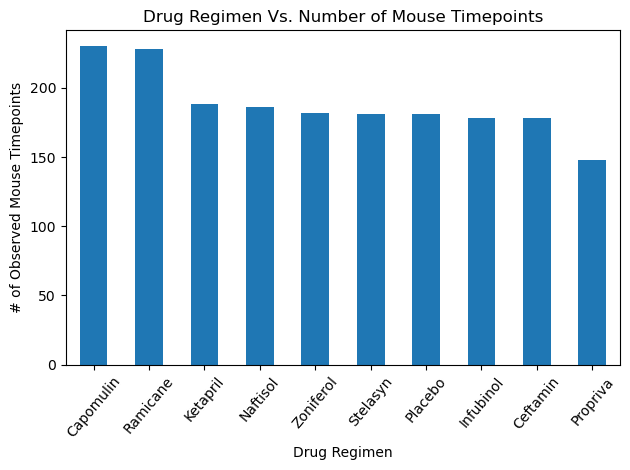

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Setting labels and title for bar graph
plt.title('Drug Regimen Vs. Number of Mouse Timepoints')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Creating the bar graph
df_drugs = df_clean["Drug Regimen"].value_counts()
df_drugs.plot(kind="bar", legend=False, rot=50)

# Save and display the bar graph
plt.savefig("../Images/bargraph-1.png")
plt.tight_layout()
plt.show()

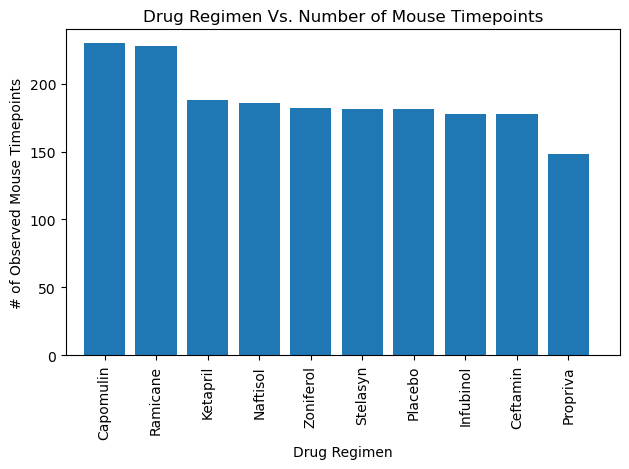

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# setting x and y axis for bar graph
x_axis = df_drugs.index.values # This is gathering the names of the drugs which are in the 
# index column of df_drugs and using that data to create an array

y_axis = df_drugs.values # This is gathering the value amount of each of the drugs which are in 
#df_drugs and using that data to create an array

# Set x and y limits for bar graph
plt.xlim(-0.75,len(x_axis))
plt.ylim(0, max(y_axis+10))

# Setting labels and title for bar graph
plt.title('Drug Regimen Vs. Number of Mouse Timepoints')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Creating bar graph
plt.tight_layout()
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis, align="center")

# Save and display the bar graph
plt.savefig("../Images/bargraph-2.png")
plt.tight_layout()
plt.show()

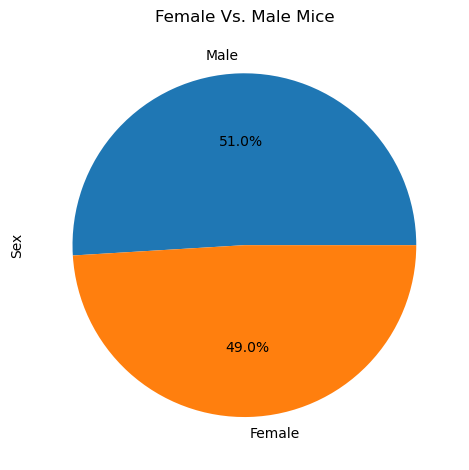

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Getting values for sex of mice for pie plot
df_sex = df_clean["Sex"].value_counts()

# Setting title for pie plot
plt.title('Female Vs. Male Mice')

# Creating pie plot
df_sex.plot(kind="pie", autopct="%1.1f%%")

# Save and display the pie plot
plt.savefig("../Images/pieplot-1.png")
plt.tight_layout()
plt.show()

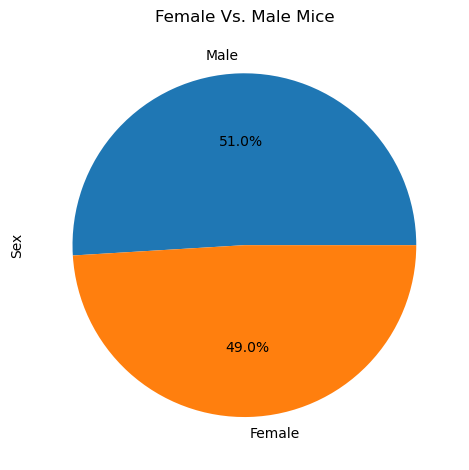

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Getting values for sex of mice for pie plot
df_sex = df_clean["Sex"].value_counts()

# Setting labels and title for pie plot
labels = ["Male", "Female"]
plt.ylabel("Sex")
plt.title('Female Vs. Male Mice')

# Creating pie plot
plt.pie(df_sex.values, labels=labels, autopct="%1.1f%%")

# Save and display the pie plot
plt.savefig("../Images/pieplot-2.png")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
df_capomulin = df_clean.loc[df_clean["Drug Regimen"] == "Capomulin", :]
df_ramicane = df_clean.loc[df_clean["Drug Regimen"] == "Ramicane", :]
df_infubinol = df_clean.loc[df_clean["Drug Regimen"] == "Infubinol", :]
df_ceftamin = df_clean.loc[df_clean["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
df_max_vol = df_clean.groupby("Mouse ID")["Timepoint"].max()
df_max_vol= df_max_vol.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df_tumorvol = df_max_vol.merge(df_clean,on=["Mouse ID","Timepoint"],how="left")

In [13]:
# Put treatments into a list for for loop (and later for plot labels)
df_treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
df_tumorvoldata=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in df_treatments: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    df_finalvol= df_tumorvol.loc[df_tumorvol["Drug Regimen"]== drug,"Tumor Volume (mm3)" ]

    # add subset 
    df_tumorvoldata.append(df_finalvol)
    
    # Determine outliers using upper and lower bounds
    quartiles = df_finalvol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = df_finalvol.loc[(df_finalvol < lower_bound) | (df_finalvol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


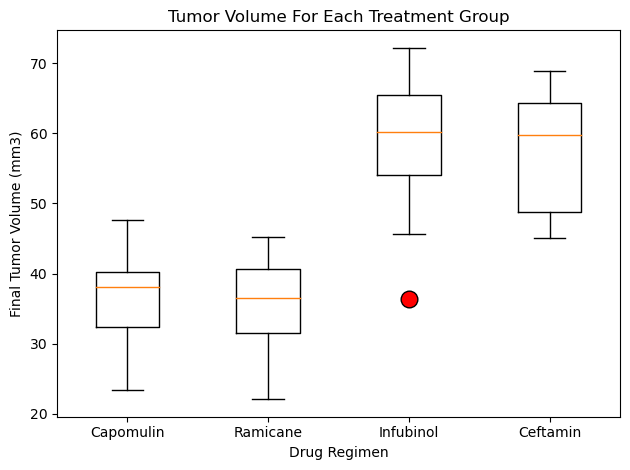

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Setting X values for box plot
df_regimen_labels = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Setting marker colors and size for box plot
df_flierprops = dict(marker='o', markerfacecolor='red', markersize=12, linestyle='none', markeredgecolor='black')

# creating box plot
fig1, box = plt.subplots()
box.boxplot(df_tumorvoldata, labels=df_regimen_labels, flierprops=df_flierprops)

# Setting labels and title for box plot
box.set_title('Tumor Volume For Each Treatment Group')
box.set_xlabel('Drug Regimen')
box.set_ylabel('Final Tumor Volume (mm3)')

# Save and display the box plot
plt.savefig("../Images/boxplot.png")
plt.tight_layout()
plt.show()

## Line and Scatter Plots

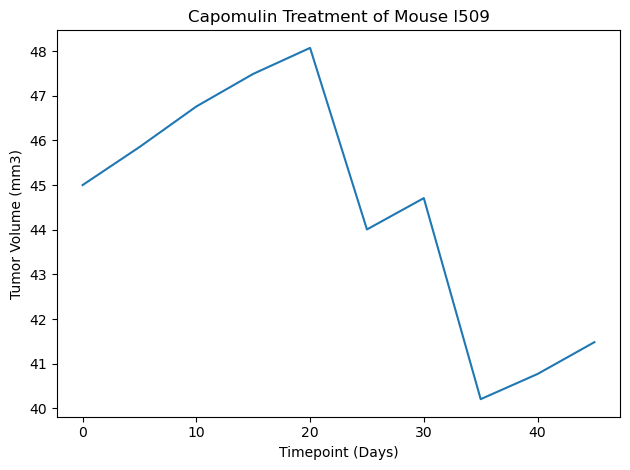

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Setting values for line graph
df_line = df_capomulin.loc[df_capomulin["Mouse ID"] == "l509",:]

# Setting axis for line graph
df_timepoint = df_line["Timepoint"]
df_tumor_size = df_line["Tumor Volume (mm3)"]

# Creating line graph
fig1, line = plt.subplots()
plt.plot(df_timepoint, df_tumor_size)

# Setting labels and title for line graph
plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Save and display the line graph
plt.savefig("../Images/linegraph.png")
plt.tight_layout()
plt.show()

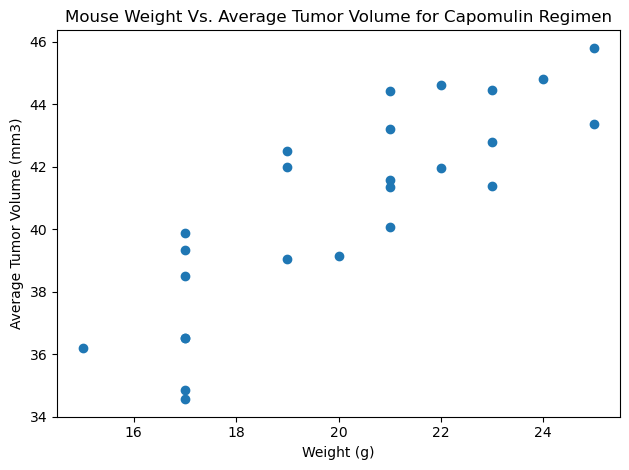

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# creating scatter plot
fig1, scatter = plt.subplots()

# setting values variables for scatter plot
df_avg_capomulin_tumorvol = df_capomulin.groupby(['Mouse ID']).mean()

# inserting values into scatter plot
plt.scatter(df_avg_capomulin_tumorvol['Weight (g)'],df_avg_capomulin_tumorvol['Tumor Volume (mm3)'])

# Setting labels and title for scatter plot
plt.title('Mouse Weight Vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Save and display the scatter plot
plt.savefig("../Images/scatterplot-1.png")
plt.tight_layout()
plt.show()

## Correlation and Regression

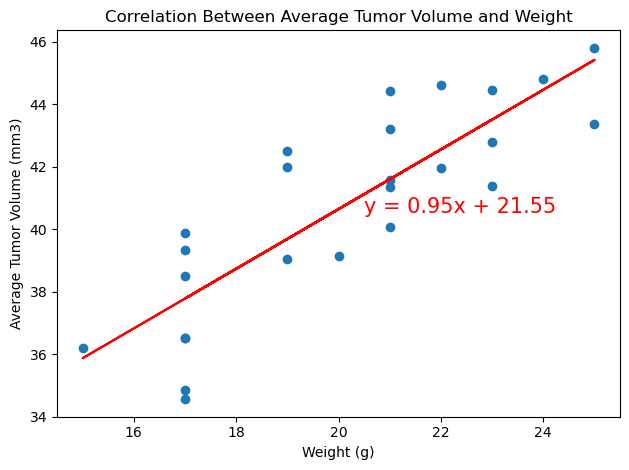

The correlation between mouse weight and the average tumor volume is 0.84


In [17]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Getting values for scatter plot
df_cor_weight = df_avg_capomulin_tumorvol['Weight (g)']
df_cor_tumorvol = df_avg_capomulin_tumorvol['Tumor Volume (mm3)']

# Creating scatter plot
plt.scatter(df_cor_weight,df_cor_tumorvol)

# Setting labels and title for scatter plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Correlation Between Average Tumor Volume and Weight')

# Setting up Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_cor_weight, df_cor_tumorvol)
df_regress_values = df_cor_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Creating scattter plot
plt.plot(df_cor_weight,df_regress_values,"r-")
plt.annotate(line_eq,(20.5,40.5),fontsize=15,color="red")

# Save and display the scatter plot
plt.savefig("../Images/scatterplot-2.png")
plt.tight_layout()
plt.show()

# Priting correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(df_cor_weight,df_cor_tumorvol)[0],2)}")
plt.show()